In [3]:
from torchdrug.datasets import Solubility,Fluorescence
from torchdrug import data
import matplotlib
#matplotlib.use('MacOSX')  # O usa 'Qt5Agg' o 'MacOSX'
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

Solubilidad

In [2]:
ds=Solubility("/Users/ely/Documents/Maestria/proyecto_tecnologico/cimat2024-proyecto/Tareas/2024_07_11",lazy=True)

17:43:21   Extracting /Users/ely/Documents/Maestria/proyecto_tecnologico/cimat2024-proyecto/Tareas/2024_07_11/solubility.tar.gz to /Users/ely/Documents/Maestria/proyecto_tecnologico/cimat2024-proyecto/Tareas/2024_07_11


Constructing proteins from sequences: 100%|██████████| 71419/71419 [00:00<00:00, 264962.42it/s]


In [3]:
sequences=ds.sequences
targets=ds.targets['solubility']

In [4]:
lens=[]
for sequence in sequences:
    lens.append(len(sequence))

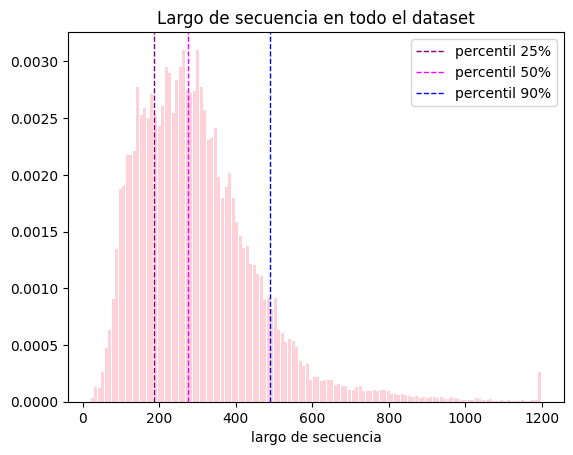

In [5]:
# Calcular los cuantiles
q1 = np.percentile(lens, 25)
q2 = np.percentile(lens, 50)
q3 = np.percentile(lens, 90)

# Crear el histograma
plt.hist(lens, bins='auto', alpha=0.7, rwidth=0.85,color='pink',density=True)
# Añadir líneas para los cuantiles
plt.axvline(q1, color='purple', linestyle='dashed', linewidth=1,label='percentil 25%')
plt.axvline(q2, color='magenta', linestyle='dashed', linewidth=1,label='percentil 50%')
plt.axvline(q3, color='b', linestyle='dashed', linewidth=1,label='percentil 90%')
# Añadir título y etiquetas
plt.title('Largo de secuencia en todo el dataset')
plt.xlabel('largo de secuencia')
plt.legend()

# Mostrar el histograma
plt.show()

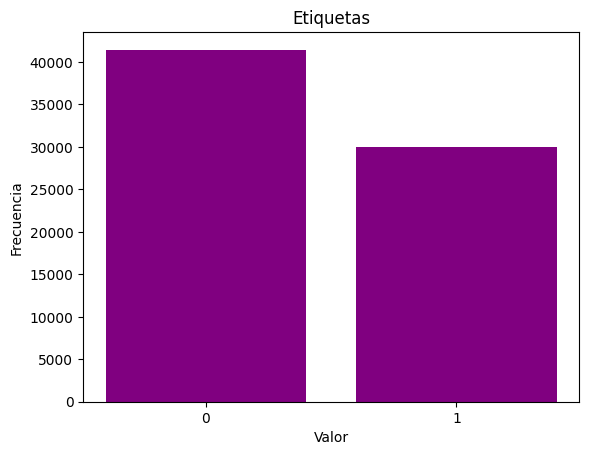

In [6]:
# Contar la frecuencia de 0 y 1
frecuencia = Counter(targets)

# Extraer las etiquetas y las frecuencias
etiquetas = list(frecuencia.keys())
valores = list(frecuencia.values())

# Crear el gráfico de barras
plt.bar(etiquetas, valores, color=['purple'])

# Añadir título y etiquetas
plt.title('Etiquetas')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.xticks([0,1])
plt.show()

In [7]:
ds.num_samples #train,valid,test

[62478, 6942, 1999]

In [8]:
train=sequences[0:ds.num_samples[0]]
val=sequences[ds.num_samples[0]:ds.num_samples[0]+ds.num_samples[1]]
test=sequences[ds.num_samples[0]+ds.num_samples[1]:]

train_target=targets[0:ds.num_samples[0]]
valid_target=targets[ds.num_samples[0]:ds.num_samples[0]+ds.num_samples[1]]
test_target=targets[ds.num_samples[0]+ds.num_samples[1]:]

In [9]:
lens_train=[len(sequence) for sequence in train]
lens_val=[len(sequence) for sequence in val]
lens_test=[len(sequence) for sequence in test]


In [10]:
len(train)

62478

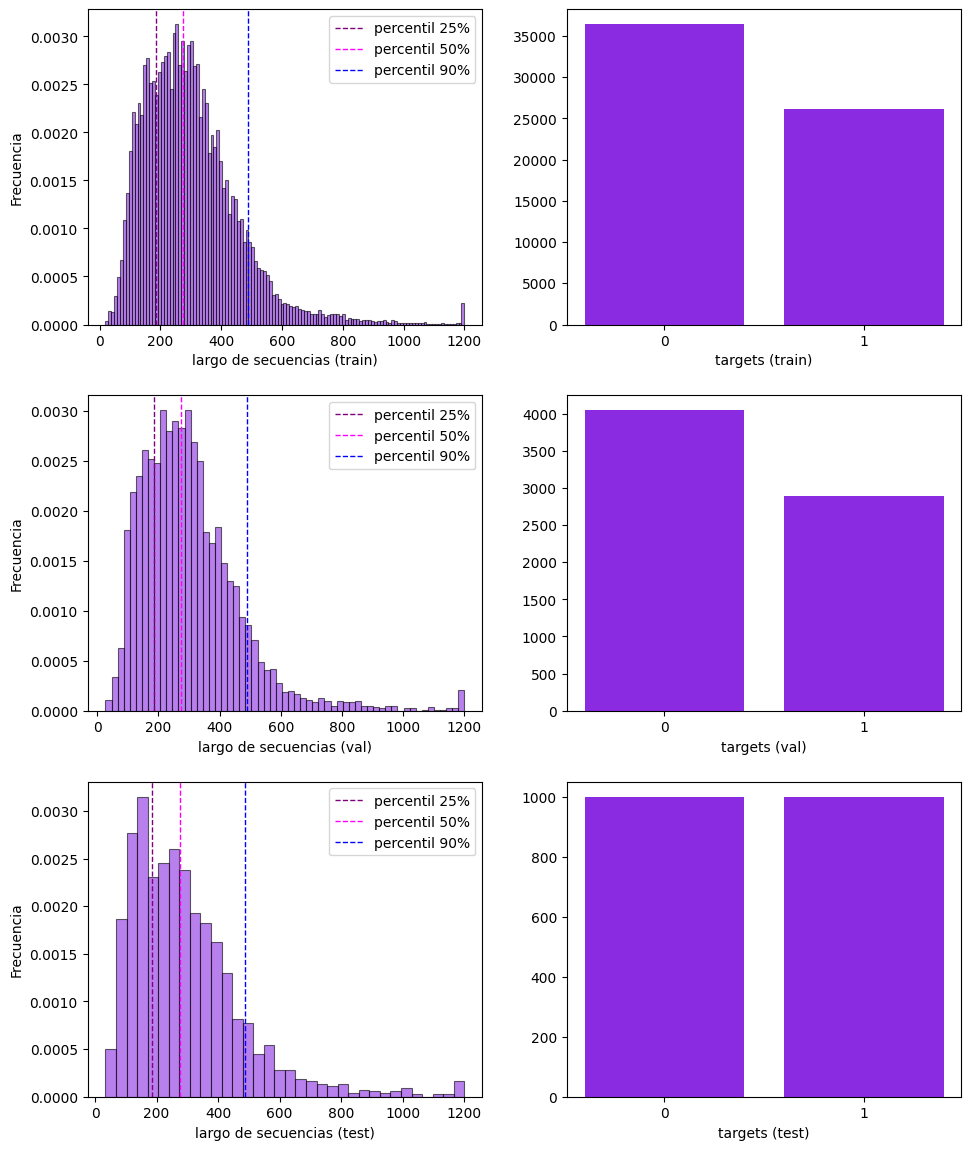

In [11]:
#Crea una nueva figura para los subgráficos
fig, axs = plt.subplots(3, 2, figsize=(10, 12))
lista=[lens_train,lens_val,lens_test]
nombres=['train','val','test']
fig.tight_layout(pad=3.0)
lista_targets=[train_target,valid_target,test_target]
m=0
for l,t in zip(lista,lista_targets):

    #Selecciona el subgráfico actual
    ax = axs[m,0]
    ay = axs[m,1]
    #Calcula el promedio y la desviación estándar de la columna 'Escala' para la hoja actual
    q1 = np.percentile(lens, 25)
    q2 = np.percentile(lens, 50)
    q3 = np.percentile(lens, 90)

        # Contar la frecuencia de 0 y 1
    frecuencia = Counter(t)

    # Extraer las etiquetas y las frecuencias
    etiquetas = list(frecuencia.keys())
    valores = list(frecuencia.values())
    
    ax.hist(l, bins='auto', alpha=0.6, color='blueviolet',edgecolor='black', linewidth=0.8,density=True)
    ax.axvline(q1, color='purple', linestyle='dashed', linewidth=1,label='percentil 25%')
    ax.axvline(q2, color='magenta', linestyle='dashed', linewidth=1,label='percentil 50%')
    ax.axvline(q3, color='b', linestyle='dashed', linewidth=1,label='percentil 90%')

    #desviación estándar 
    #ax.axvline(x=promedio + desviacion_estandar, color='purple', linestyle='--', label=f'$\pm$ $\sigma$={desviacion_estandar:.2f}')
    #ax.axvline(x=promedio - desviacion_estandar, color='purple', linestyle='--')
    
    
    #título uy ejes
    #ax.set_title(f'{solo_nombre}')
    ax.set_xlabel('largo de secuencias (' +nombres[m]+')')
    ax.set_ylabel('Frecuencia')
    ax.legend()

    ay.bar(etiquetas, valores, color=['blueviolet'])
    ay.set_xlabel('targets (' +nombres[m]+')')
    ay.set_xticks([0,1])
    
    


    m=m+1





# Mostrar el histograma
plt.show()
# Muestra los subgráficos
plt.show()

In [12]:
def truncate(sequences,targets):
    new_sequences=[]
    new_targets=[]
    for sequence,target in zip(sequences,targets):
        if len(sequence)<500:
            new_sequences.append(sequence)
            new_targets.append(target)
    return new_sequences,new_targets

In [13]:
new_sequences_train,new_target_train=truncate(train,train_target)
new_sequences_test,new_target_test=truncate(test,test_target)
new_sequences_valid,new_target_valid=truncate(val,valid_target)

In [14]:
len(new_sequences_train)

56845

In [15]:
lens_new_train=[len(sequence) for sequence in new_sequences_train]
lens_new_val=[len(sequence) for sequence in new_sequences_valid]
lens_new_test=[len(sequence) for sequence in new_sequences_test]

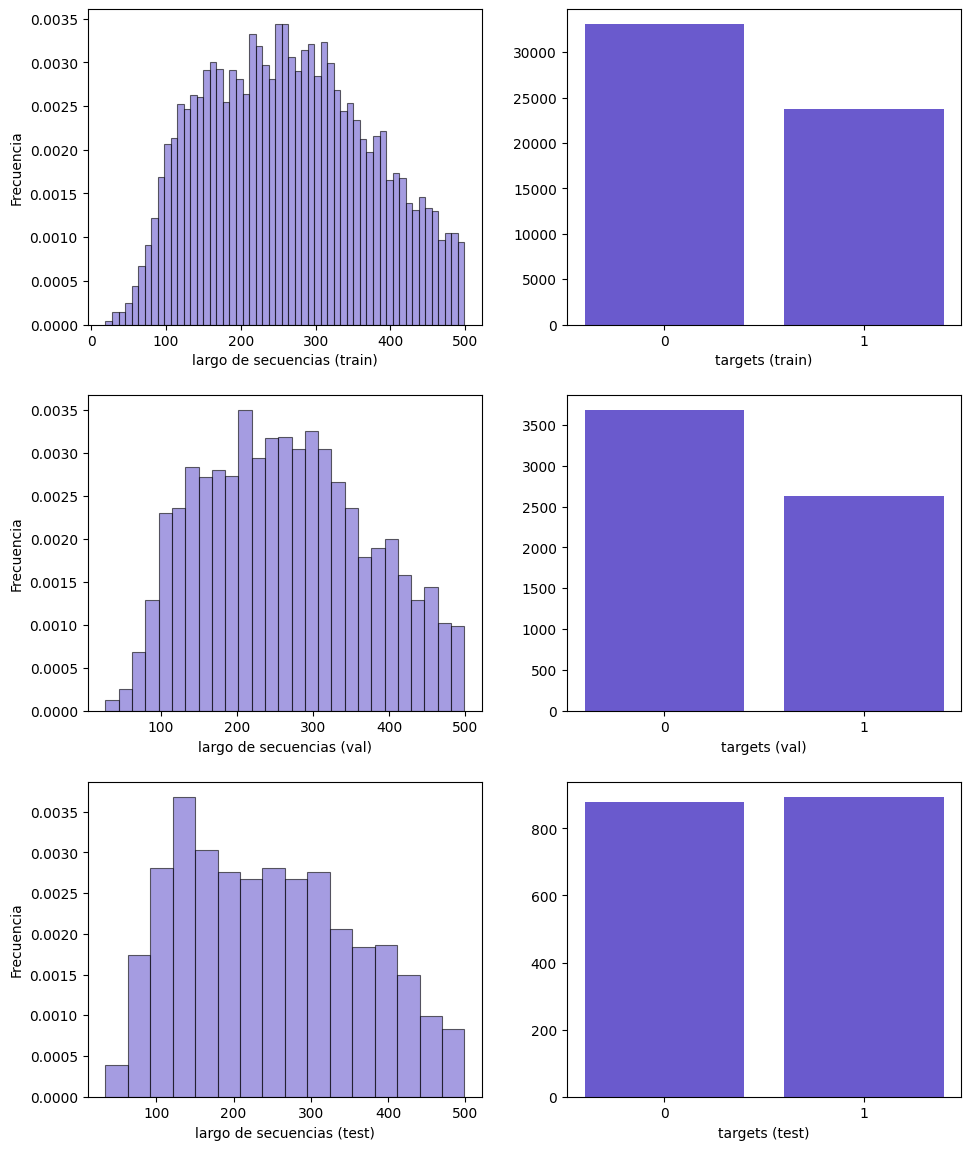

In [16]:
#Crea una nueva figura para los subgráficos
fig, axs = plt.subplots(3, 2, figsize=(10, 12))
lista=[lens_new_train,lens_new_val,lens_new_test]
nombres=['train','val','test']
fig.tight_layout(pad=3.0)
lista_targets=[new_target_train,new_target_valid,new_target_test]
m=0
for l,t in zip(lista,lista_targets):

    #Selecciona el subgráfico actual
    ax = axs[m,0]
    ay = axs[m,1]


        # Contar la frecuencia de 0 y 1
    frecuencia = Counter(t)

    # Extraer las etiquetas y las frecuencias
    etiquetas = list(frecuencia.keys())
    valores = list(frecuencia.values())
    
    ax.hist(l, bins='auto', alpha=0.6, color='slateblue', edgecolor='black', linewidth=0.8,density=True)


    #desviación estándar 
    #ax.axvline(x=promedio + desviacion_estandar, color='purple', linestyle='--', label=f'$\pm$ $\sigma$={desviacion_estandar:.2f}')
    #ax.axvline(x=promedio - desviacion_estandar, color='purple', linestyle='--')
    
    
    #título uy ejes
    #ax.set_title(f'{solo_nombre}')
    ax.set_xlabel('largo de secuencias (' +nombres[m]+')')
    ax.set_ylabel('Frecuencia')
    

    ay.bar(etiquetas, valores, color=['slateblue'])
    ay.set_xlabel('targets (' +nombres[m]+')')
    ay.set_xticks([0,1])
    
    


    m=m+1





# Mostrar el histograma
plt.show()


Fluoresencia

In [4]:
ds=Fluorescence("/Users/ely/Documents/Maestria/proyecto_tecnologico/cimat2024-proyecto/Tareas/2024_07_11",lazy=True)

20:10:04   Extracting /Users/ely/Documents/Maestria/proyecto_tecnologico/cimat2024-proyecto/Tareas/2024_07_11/fluorescence.tar.gz to /Users/ely/Documents/Maestria/proyecto_tecnologico/cimat2024-proyecto/Tareas/2024_07_11


Constructing proteins from sequences: 100%|██████████| 54025/54025 [00:00<00:00, 498229.51it/s]


In [5]:
sequences1=ds.sequences
targets=ds.targets['log_fluorescence']

In [6]:
lens1=[]
for seq in sequences1:
    lens1.append(len(seq))

In [7]:
set(lens1)

{235, 236, 237}

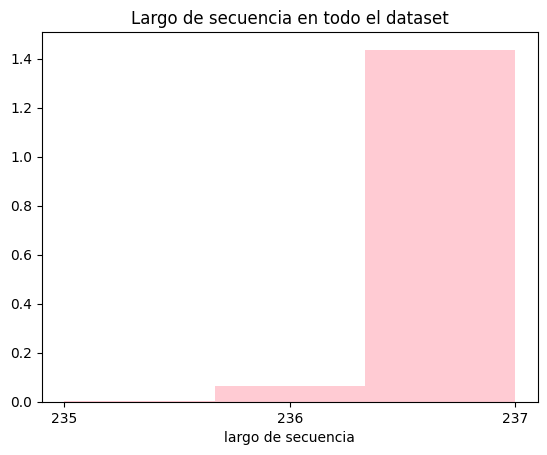

In [14]:
# Calcular los cuantiles


# Crear el histograma
plt.hist(lens1, bins=3, alpha=0.7,color='LightPink',density=True)
# Añadir líneas para los cuantiles

# Añadir título y etiquetas
plt.title('Largo de secuencia en todo el dataset')
plt.xlabel('largo de secuencia')
plt.xticks([235,236,237])
# Mostrar el histograma
plt.show()

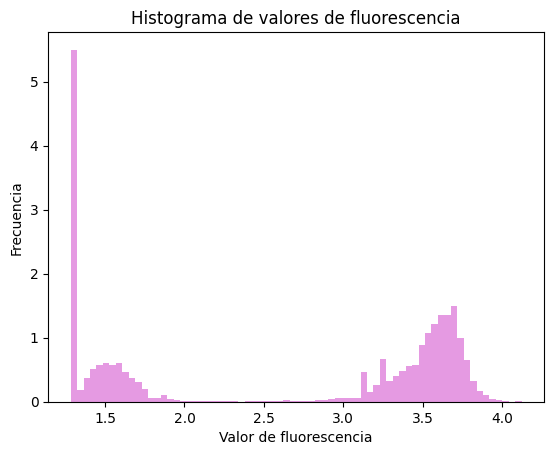

In [17]:
# Crear el histograma
plt.hist(targets, bins=70, color='orchid', alpha=0.7,density=True)

# Añadir título y etiquetas
plt.title('Histograma de valores de fluorescencia')
plt.xlabel('Valor de fluorescencia')
plt.ylabel('Frecuencia')
plt.show()
